# Figure 3 (MF-phystrends)


In [167]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [168]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
from importlib import reload
import matplotlib.path as mpath
import glob
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

plt.rcParams['axes.facecolor'] = 'white'

### scenario description dict

In [169]:

scendict = {
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'color2':'orange'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'color2':'orangered'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'color2':'mediumseagreen'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'color2':'green'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'color2':'dodgerblue'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'color2':'mediumblue'}
}


### load data shown in figs 1 and 2

In [170]:
extract = False

baseDir = '/gpfs/home/mep22dku/scratch/SO-wind-feedback/data/fig2/'

mld_ukesm_1A = xr.open_dataset(f'{baseDir}//somxl010_ukesm_1A.nc')
mld_ukesm_1B = xr.open_dataset(f'{baseDir}//somxl010_ukesm_1B.nc')
mld_ukesm_2A = xr.open_dataset(f'{baseDir}//somxl010_ukesm_2A.nc')
mld_ukesm_2B = xr.open_dataset(f'{baseDir}//somxl010_ukesm_2B.nc')
mld_ukesm_3A = xr.open_dataset(f'{baseDir}//somxl010_ukesm_3A.nc')
mld_ukesm_3B = xr.open_dataset(f'{baseDir}//somxl010_ukesm_3B.nc')


sst_ukesm_1A = xr.open_dataset(f'{baseDir}//SST_ukesm_1A.nc')
sst_ukesm_1B = xr.open_dataset(f'{baseDir}//SST_ukesm_1B.nc')
sst_ukesm_2A = xr.open_dataset(f'{baseDir}//SST_ukesm_2A.nc')
sst_ukesm_2B = xr.open_dataset(f'{baseDir}//SST_ukesm_2B.nc')
sst_ukesm_3A = xr.open_dataset(f'{baseDir}//SST_ukesm_3A.nc')
sst_ukesm_3B = xr.open_dataset(f'{baseDir}//SST_ukesm_3B.nc')

Cflx_ukesm_1A = xr.open_dataset(f'{baseDir}//CflxTS_ukesm_1A_SO.nc')
Cflx_ukesm_1B = xr.open_dataset(f'{baseDir}//CflxTS_ukesm_1B_SO.nc')
Cflx_ukesm_2A = xr.open_dataset(f'{baseDir}//CflxTS_ukesm_2A_SO.nc')
Cflx_ukesm_2B = xr.open_dataset(f'{baseDir}//CflxTS_ukesm_2B_SO.nc')
Cflx_ukesm_3A = xr.open_dataset(f'{baseDir}//CflxTS_ukesm_3A_SO.nc')
Cflx_ukesm_3B = xr.open_dataset(f'{baseDir}//CflxTS_ukesm_3B_SO.nc')
    
ot_ukesm_1A = xr.open_dataset('./data/fig2/ot_ukesm_1A.nc')
ot_ukesm_1B = xr.open_dataset('./data/fig2/ot_ukesm_1B.nc')
ot_ukesm_2A = xr.open_dataset('./data/fig2/ot_ukesm_2A.nc')
ot_ukesm_2B = xr.open_dataset('./data/fig2/ot_ukesm_2B.nc')
ot_ukesm_3A = xr.open_dataset('./data/fig2/ot_ukesm_3A.nc')
ot_ukesm_3B = xr.open_dataset('./data/fig2/ot_ukesm_3B.nc')

baseDir = '/gpfs/home/mep22dku/scratch/SO-wind-feedback/data/fig1/'

#wspd_PI = xr.open_dataset(f'{baseDir}/UKESM_PI_wspd10m_overwater-50S-mean.nc')
#ot_ukesm_2A
wspd_ukesm_1A = xr.open_dataset(f'{baseDir}/UKESM_1A_wspd10m_overwater-50S-mean.nc')
wspd_ukesm_2A = xr.open_dataset(f'{baseDir}/UKESM_2A_wspd10m_overwater-50S-mean.nc')
wspd_ukesm_3A = xr.open_dataset(f'{baseDir}/UKESM_3A_wspd10m_overwater-50S-mean.nc')
wspd_ukesm_1B = xr.open_dataset(f'{baseDir}/UKESM_1B_wspd10m_overwater-50S-mean.nc')
wspd_ukesm_2B = xr.open_dataset(f'{baseDir}/UKESM_2B_wspd10m_overwater-50S-mean.nc')
wspd_ukesm_3B = xr.open_dataset(f'{baseDir}/UKESM_3B_wspd10m_overwater-50S-mean.nc')

### get 50yr change contribution of ozone and ghg from trend, start with MLD (toggle extract on/off here)

In [171]:
extract = False

In [172]:
import pymannkendall as mk
from scipy import stats
def give_trends(ts_x,ts_y):

    trend, h, mk_p, z, Tau, s, var_s, mk_slope, mk_intercept = mk.original_test(ts_y)
    lin_slope, lin_intercept, r_value, lin_p, std_err = stats.linregress(ts_x,ts_y)
    
    return mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p 

In [173]:
verbose = True
if extract:
    mld_ukesm_2A_50 = mld_ukesm_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
    mld_ukesm_2B_50 = mld_ukesm_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

    mld_OR_A = mld_ukesm_1A-mld_ukesm_2A
    mld_OR_B = mld_ukesm_1B-mld_ukesm_2B
    var = 'somxl010'

    datar = np.zeros([3,5,2,2])
    sigar = np.zeros([3,5,2,2])
    sigar[:] = 1

    data_vars = {
        'trend':(['period', 'season','forcing','scenario'], datar,
    {'units': '/decade',
    'long_name':''}),
        'sig':(['period', 'season','forcing','scenario'], sigar,
    {'units': 'significance (1 is sig)',
    'long_name':''}),
    }
    # define coordinates
    coords = {'period': (['period'], ['1950-2000','2000-2050','2050-2100']),
              'season': (['season'], ['FY','DJF','MAM','JJA','SON']),
              'forcing': (['forcing'], ['ghg','ozone']),
              'scenario': (['scenario'], ['ssp1','ssp3']),
             }
    attrs = {'made in':'SOZONE/windAnalyis/oceanFields/bargraph-with-50yrtrends.ipynb',
    'desc': 'medusa trends in quantity of interest, south of -50 south, decadal'
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    # ds.tonetcdf()
    periodar = ['1950-2000','2000-2050','2050-2100']
    seasar = ['FY','DJF','MAM','JJA','SON']
    scenar = ['ssp1', 'ssp3']
    dsar = [mld_OR_A, mld_OR_B]
    periodst = [1950,2000,2050]
    perioden = [2000,2050,2100]

    # plt.figure()
    ### or, low ssp
    tforc = 'ozone'; tscen = 'ssp1';
     #ozone-isolated scenarios
    for s in range(0,2):
        tscen = scenar[s]
        tds = dsar[s]

        for p in range(0,3):
            tper = periodar[p]
            for s in range(0,5):
                tseas = seasar[s]
                tsig = 1
                if verbose:
                    print('')
                    print(f'{tper}, {tseas}')
                tdat = tds[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
                if tseas == 'FY':
                    tval = tdat.groupby('time_counter.year').mean()
        #             plt.plot(tval,label = tper)
        #             ts_x = np.arange(periodst[p],perioden[p])
                    ts_x = np.arange(50)

                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')

                    if lin_p > 0.05:
                        tsig = 0

                else:
                    tval = tdat.sel(time_counter=(tdat['time_counter.season'] == tseas)).\
                    groupby('time_counter.year').mean()



                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')
                    if lin_p > 0.05:
                        tsig = 0                       

                ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = lin_slope*10
                ds.sig.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = tsig
                if verbose:
                    print(f'{tper},{tseas},{tforc},{tscen}, trend--{lin_slope*10} ({lin_p}, ({tsig}))')

    tforc = 'ghg'; 
    tds1ar = [mld_ukesm_2A, mld_ukesm_2B]
    tdsBASEar = [mld_ukesm_2A_50, mld_ukesm_2B_50]
    #ghg-isolated scenarios
    for s in range(0,2):
        tscen = scenar[s]
        tds1 = tds1ar[s]
        tdsBASE = tdsBASEar[s]

        for p in range(0,3):
            tper = periodar[p]
            for s in range(0,5):
                tseas = seasar[s]
                tsig = 1
                if verbose:
                    print('')
                    print(f'{tper}, {tseas}')


                if tseas == 'FY':
                    tval = tds1[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))\
                    .groupby('time_counter.year').mean()-\
                    tdsBASE[var].mean().values
        #             plt.plot(tval,label = tper)
        #             ts_x = np.arange(periodst[p],perioden[p])
                    ts_x = np.arange(50)

                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')

                    if lin_p > 0.05:
                        tsig = 0    

                else:
                    tval = tds1[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
                    tval = tval.sel(time_counter=(tval['time_counter.season'] == tseas)).\
                    groupby('time_counter.year').mean()-\
                    tdsBASE[var].sel(time_counter=(tdsBASE['time_counter.season'] == tseas)).\
                    mean().values
                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')
                    if lin_p > 0.05:
                        tsig = 0         

                ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = lin_slope*10
                ds.sig.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = tsig

                if verbose:
                    print(f'{tper},{tseas},{tforc},{tscen}, trend--{lin_slope*10} ({lin_p}, ({tsig}))')


    # plt.legend()
    ds.to_netcdf('./data/fig3/mld-medusa-50yrtrends.nc')

### same for sst

In [174]:
verbose = True
if extract:
    
    sst_ukesm_2A_50 = sst_ukesm_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
    sst_ukesm_2B_50 = sst_ukesm_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

    sst_OR_A = sst_ukesm_1A-sst_ukesm_2A
    sst_OR_B = sst_ukesm_1B-sst_ukesm_2B
    var = 'tos'

    datar = np.zeros([3,5,2,2])
    sigar = np.zeros([3,5,2,2])
    sigar[:] = 1

    data_vars = {
        'trend':(['period', 'season','forcing','scenario'], datar,
    {'units': '/decade',
    'long_name':''}),
        'sig':(['period', 'season','forcing','scenario'], sigar,
    {'units': 'significance (1 is sig)',
    'long_name':''}),
    }
    # define coordinates
    coords = {'period': (['period'], ['1950-2000','2000-2050','2050-2100']),
              'season': (['season'], ['FY','DJF','MAM','JJA','SON']),
              'forcing': (['forcing'], ['ghg','ozone']),
              'scenario': (['scenario'], ['ssp1','ssp3']),
             }
    attrs = {'made in':'SOZONE/windAnalyis/oceanFields/bargraph-with-50yrtrends.ipynb',
    'desc': 'medusa trends in quantity of interest, south of -50 south, decadal'
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    # ds.tonetcdf()
    periodar = ['1950-2000','2000-2050','2050-2100']
    seasar = ['FY','DJF','MAM','JJA','SON']
    scenar = ['ssp1', 'ssp3']
    dsar = [sst_OR_A, sst_OR_B]
    periodst = [1950,2000,2050]
    perioden = [2000,2050,2100]

    # plt.figure()
    ### or, low ssp
    tforc = 'ozone'; tscen = 'ssp1';
     #ozone-isolated scenarios
    for s in range(0,2):
        tscen = scenar[s]
        tds = dsar[s]

        for p in range(0,3):
            tper = periodar[p]
            for s in range(0,5):
                tseas = seasar[s]
                tsig = 1
                if verbose:
                    print('')
                    print(f'{tper}, {tseas}')
                tdat = tds[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
                if tseas == 'FY':
                    tval = tdat.groupby('time_counter.year').mean()
        #             plt.plot(tval,label = tper)
        #             ts_x = np.arange(periodst[p],perioden[p])
                    ts_x = np.arange(50)

                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')

                    if lin_p > 0.05:
                        tsig = 0

                else:
                    tval = tdat.sel(time_counter=(tdat['time_counter.season'] == tseas)).\
                    groupby('time_counter.year').mean()



                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')
                    if lin_p > 0.05:
                        tsig = 0                       

                ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = lin_slope*10
                ds.sig.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = tsig
                if verbose:
                    print(f'{tper},{tseas},{tforc},{tscen}, trend: {lin_slope*10} ({lin_p}, ({tsig}))')

    tforc = 'ghg'; 
    tds1ar = [sst_ukesm_2A, sst_ukesm_2B]
    tdsBASEar = [sst_ukesm_2A_50, sst_ukesm_2B_50]
    #ghg-isolated scenarios
    for s in range(0,2):
        tscen = scenar[s]
        tds1 = tds1ar[s]
        tdsBASE = tdsBASEar[s]

        for p in range(0,3):
            tper = periodar[p]
            for s in range(0,5):
                tseas = seasar[s]
                tsig = 1
                if verbose:
                    print('')
                    print(f'{tper}, {tseas}')


                if tseas == 'FY':
                    tval = tds1[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))\
                    .groupby('time_counter.year').mean()-\
                    tdsBASE[var].mean().values
        #             plt.plot(tval,label = tper)
        #             ts_x = np.arange(periodst[p],perioden[p])
                    ts_x = np.arange(50)

                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')

                    if lin_p > 0.05:
                        tsig = 0    

                else:
                    tval = tds1[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
                    tval = tval.sel(time_counter=(tval['time_counter.season'] == tseas)).\
                    groupby('time_counter.year').mean()-\
                    tdsBASE[var].sel(time_counter=(tdsBASE['time_counter.season'] == tseas)).\
                    mean().values
                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')
                    if lin_p > 0.05:
                        tsig = 0         

                ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = lin_slope*10
                ds.sig.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = tsig

                if verbose:
                    print(f'{tper},{tseas},{tforc},{tscen}, trend: {lin_slope*10} ({lin_p}, ({tsig}))')


    # plt.legend()
    ds.to_netcdf('./data/fig3/sst-medusa-50yrtrends.nc')

### same for OT

In [175]:
verbose = True
if extract:
    ot_ukesm_2A_50 = ot_ukesm_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
    ot_ukesm_2B_50 = ot_ukesm_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

    ot_OR_A = ot_ukesm_1A-ot_ukesm_2A
    ot_OR_B = ot_ukesm_1B-ot_ukesm_2B
    var = 'max_OT'
    var1 = 'max_OT_yr'

    datar = np.zeros([3,5,2,2])
    sigar = np.zeros([3,5,2,2])
    data_vars = {
        'trend':(['period', 'season','forcing','scenario'], datar,
    {'units': '/decade',
    'long_name':''}),
        'sig':(['period', 'season','forcing','scenario'], sigar,
    {'units': 'significance (1 is sig)',
    'long_name':''}),
    }

    # define coordinates
    coords = {'period': (['period'], ['1950-2000','2000-2050','2050-2100']),
              'season': (['season'], ['FY','DJF','MAM','JJA','SON']),
              'forcing': (['forcing'], ['ghg','ozone']),
              'scenario': (['scenario'], ['ssp1','ssp3']),
             }
    attrs = {'made in':'SOZONE/windAnalyis/oceanFields/bargraph-with-50yrtrends.ipynb',
    'desc': 'medusa trends in quantity of interest, south of -50 south, decadal'
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    # ds.tonetcdf()
    periodar = ['1950-2000','2000-2050','2050-2100']
    seasar = ['FY','DJF','MAM','JJA','SON']
    scenar = ['ssp1', 'ssp3']
    dsar = [ot_OR_A, ot_OR_B]
    periodst = [1950,2000,2050]
    perioden = [2000,2050,2100]

    # plt.figure()
    ### or, low ssp
    tforc = 'ozone'; tscen = 'ssp1';
     #ozone-isolated scenarios
    for s in range(0,2):
        tscen = scenar[s]
        tds = dsar[s]

        for p in range(0,3):
            tper = periodar[p]
            for s in range(0,5):
                tseas = seasar[s]
                tsig = 1
                if verbose:
                    print('')
                    print(f'{tper}, {tseas}')
                if tseas == 'FY':
                    tdat = tds[var1].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
                    tval = tdat.groupby('time_counter.year').mean()
                    ts_x = np.arange(50)

                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')

                    if lin_p > 0.05:
                        tsig = 0

                else:
                    tdat = tds[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
                    tval = tdat.sel(time_counter=(tdat['time_counter.season'] == tseas)).\
                    groupby('time_counter.year').mean()



                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')
                    if lin_p > 0.05:
                        tsig = 0                   

                ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = lin_slope*10
                ds.sig.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = tsig

                if verbose:
                    print(f'{tper},{tseas},{tforc},{tscen}, trend: {lin_slope*10} ({lin_p}, ({tsig}))')

    tforc = 'ghg'; 
    tds1ar = [ot_ukesm_2A, ot_ukesm_2B]
    tdsBASEar = [ot_ukesm_2A_50, ot_ukesm_2B_50]
    #ghg-isolated scenarios
    for s in range(0,2):
        tscen = scenar[s]
        tds1 = tds1ar[s]
        tdsBASE = tdsBASEar[s]

        for p in range(0,3):
            tper = periodar[p]
            for s in range(0,5):
                tseas = seasar[s]
                tsig = 1
                if verbose:
                    print('')
                    print(f'{tper}, {tseas}')


                if tseas == 'FY':
                    tval = tds1[var1].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))\
                    .groupby('time_counter.year').mean()-\
                    tdsBASE[var1].mean().values
        #             plt.plot(tval,label = tper)
        #             ts_x = np.arange(periodst[p],perioden[p])
                    ts_x = np.arange(50)

                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')

                    if lin_p > 0.05:
                        tsig = 0

                else:
                    tval = tds1[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
                    tval = tval.sel(time_counter=(tval['time_counter.season'] == tseas)).\
                    groupby('time_counter.year').mean()-\
                    tdsBASE[var].sel(time_counter=(tdsBASE['time_counter.season'] == tseas)).\
                    mean().values
                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')
                    if lin_p > 0.05:
                        tsig = 0                   

                ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = lin_slope*10
                ds.sig.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = tsig
                if verbose:
                    print(f'{tper},{tseas},{tforc},{tscen}, trend: {lin_slope*10} ({lin_p}, ({tsig}))')


    # plt.legend()
    ds.to_netcdf('./data/fig3/ot-medusa-50yrtrends.nc')

### same for wind speed

In [176]:
verbose = True
if extract:
    wspd_ukesm_2A_50 = wspd_ukesm_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
    wspd_ukesm_2B_50 = wspd_ukesm_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

    wspd_OR_A = wspd_ukesm_1A-wspd_ukesm_2A
    wspd_OR_B = wspd_ukesm_1B-wspd_ukesm_2B
    var = 'wspd10m'

    datar = np.zeros([3,5,2,2])
    sigar = np.zeros([3,5,2,2])
    sigar[:] = 1

    data_vars = {
        'trend':(['period', 'season','forcing','scenario'], datar,
    {'units': '/decade',
    'long_name':''}),
        'sig':(['period', 'season','forcing','scenario'], sigar,
    {'units': 'significance (1 is sig)',
    'long_name':''}),
    }
    # define coordinates
    coords = {'period': (['period'], ['1950-2000','2000-2050','2050-2100']),
              'season': (['season'], ['FY','DJF','MAM','JJA','SON']),
              'forcing': (['forcing'], ['ghg','ozone']),
              'scenario': (['scenario'], ['ssp1','ssp3']),
             }
    attrs = {'made in':'SOZONE/windAnalyis/oceanFields/bargraph-with-50yrtrends.ipynb',
    'desc': 'medusa trends in quantity of interest, south of -50 south, decadal'
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    # ds.tonetcdf()
    periodar = ['1950-2000','2000-2050','2050-2100']
    seasar = ['FY','DJF','MAM','JJA','SON']
    scenar = ['ssp1', 'ssp3']
    dsar = [wspd_OR_A, wspd_OR_B]
    periodst = [1950,2000,2050]
    perioden = [2000,2050,2100]

    # plt.figure()
    ### or, low ssp
    tforc = 'ozone'; tscen = 'ssp1';
     #ozone-isolated scenarios
    for s in range(0,2):
        tscen = scenar[s]
        tds = dsar[s]

        for p in range(0,3):
            tper = periodar[p]
            for s in range(0,5):
                tseas = seasar[s]
                tsig = 1
                if verbose:
                    print('')
                    print(f'{tper}, {tseas}')
                tdat = tds[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
                if tseas == 'FY':
                    tval = tdat.groupby('time_counter.year').mean()
        #             plt.plot(tval,label = tper)
        #             ts_x = np.arange(periodst[p],perioden[p])
                    ts_x = np.arange(50)

                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')

                    if lin_p > 0.05:
                        tsig = 0

                else:
                    tval = tdat.sel(time_counter=(tdat['time_counter.season'] == tseas)).\
                    groupby('time_counter.year').mean()



                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')
                    if lin_p > 0.05:
                        tsig = 0                       

                ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = lin_slope*10
                ds.sig.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = tsig
                if verbose:
                    print(f'{tper},{tseas},{tforc},{tscen}, trend: {lin_slope*10} ({lin_p}, ({tsig}))')

    tforc = 'ghg'; 
    tds1ar = [wspd_ukesm_2A, wspd_ukesm_2B]
    tdsBASEar = [wspd_ukesm_2A_50, wspd_ukesm_2B_50]
    #ghg-isolated scenarios
    for s in range(0,2):
        tscen = scenar[s]
        tds1 = tds1ar[s]
        tdsBASE = tdsBASEar[s]

        for p in range(0,3):
            tper = periodar[p]
            for s in range(0,5):
                tseas = seasar[s]
                tsig = 1
                if verbose:
                    print('')
                    print(f'{tper}, {tseas}')


                if tseas == 'FY':
                    tval = tds1[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))\
                    .groupby('time_counter.year').mean()-\
                    tdsBASE[var].mean().values
        #             plt.plot(tval,label = tper)
        #             ts_x = np.arange(periodst[p],perioden[p])
                    ts_x = np.arange(50)

                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')

                    if lin_p > 0.05:
                        tsig = 0    

                else:
                    tval = tds1[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
                    tval = tval.sel(time_counter=(tval['time_counter.season'] == tseas)).\
                    groupby('time_counter.year').mean()-\
                    tdsBASE[var].sel(time_counter=(tdsBASE['time_counter.season'] == tseas)).\
                    mean().values
                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')
                    if lin_p > 0.05:
                        tsig = 0         

                ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = lin_slope*10
                ds.sig.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = tsig

                if verbose:
                    print(f'{tper},{tseas},{tforc},{tscen}, trend: {lin_slope*10} ({lin_p}, ({tsig}))')


    # plt.legend()
    ds.to_netcdf('./data/fig3/wspd-medusa-50yrtrends.nc')

### put all 4 quantity trends trends into 1 database (toggle collate TRUE)

In [177]:
collate = False
if collate:
    
    tdir = './data/fig3/'
    wspd_t = xr.open_dataset(f'{tdir}/wspd-medusa-50yrtrends.nc')
    ot_t = xr.open_dataset(f'{tdir}/ot-medusa-50yrtrends.nc')
    mld_t = xr.open_dataset(f'{tdir}/mld-medusa-50yrtrends.nc')
    sst_t = xr.open_dataset(f'{tdir}/sst-medusa-50yrtrends.nc')
    datar = np.zeros([3,5,4,2,2])
    sigar = np.zeros([3,5,4,2,2])

    data_vars = {
        'trend':(['period', 'season', 'quantity', 'forcing','scenario'], datar,
    {'units': '/decade',
    'long_name':''}),
        
        'sig':(['period', 'season', 'quantity', 'forcing','scenario'], sigar,
    {'units': '0 not sig, 1 sig',
    'long_name':''}),
        
    }
    # define coordinates
    coords = {'period': (['period'], ['1950-2000','2000-2050','2050-2100']),
              'season': (['season'], ['FY','DJF','MAM','JJA','SON']),
              'quantity': (['quantity'], ['wind','sst','mld','ot']),
              'forcing': (['forcing'], ['ghg','ozone']),
              'scenario': (['scenario'], ['ssp1','ssp3']),

             }
    attrs = {'made in':'scratch/SO-wind-feedback/MF-phystrends.ipynb',
    'desc': ''
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)


    periodar =  ['1950-2000','2000-2050','2050-2100']
    seasonar = ['FY','DJF','MAM','JJA','SON']
    quantityar = ['wind','sst','mld','ot']
    quantityh = [wspd_t, sst_t, mld_t, ot_t]
    forcingar = ['ghg','ozone']
    scenarioar = ['ssp1','ssp3']

    ind = 0
    for q in quantityar:
        tds = quantityh[ind]

        for p in periodar:
            for se in seasonar:

                for f in forcingar:
                    for sc in scenarioar:

                        tval = tds.trend.loc[{'period':p, 'season':se,\
                                              'forcing': f, 'scenario': sc }].values
                        print(f'period {p}, season {se}, quantity {q}, forcing {f}, scenario {sc}: {tval}')
                        ds.trend.loc[{'period':p, 'season':se, 'quantity': q, \
                                              'forcing': f, 'scenario': sc }] = tval
                        
                        tval = tds.sig.loc[{'period':p, 'season':se,\
                                              'forcing': f, 'scenario': sc }].values
                        print(f'period {p}, season {se}, quantity {q}, forcing {f}, scenario {sc}: {tval}')
                        ds.sig.loc[{'period':p, 'season':se, 'quantity': q, \
                                              'forcing': f, 'scenario': sc }] = tval
        ind = ind + 1

    ds.to_netcdf('./data/fig3/all-medusa-50yrtrends.nc')

#ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'quantity': tquant, 'scenario' : tscen}] 

# LOAD PLOTTED DATA

In [178]:
ds = xr.open_dataset('./data/fig3/all-medusa-50yrtrends.nc')

# * MAIN FIGURE * noto version of figure for revised paper

2 rows only, year-average values for SSP1 and SSP3

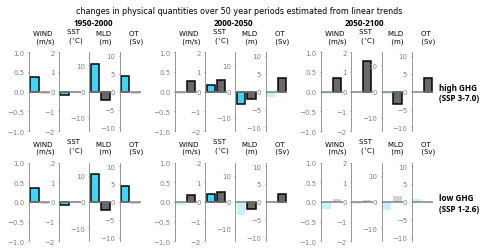

In [179]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.gridspec as gridspec
verbose = False

# Specify the paths to the Noto Sans font files
noto_sans_regular = "/gpfs/home/mep22dku/scratch/Noto_Sans/static/NotoSans-Regular.ttf"
noto_sans_bold = "/gpfs/home/mep22dku/scratch/Noto_Sans/static/NotoSans-Bold.ttf"

# Create FontProperties objects for Noto Sans
noto_font_regular = font_manager.FontProperties(fname=noto_sans_regular)
noto_font_bold = font_manager.FontProperties(fname=noto_sans_bold)

tw = 1.2; marg = 0.2; biggap = 0.6; smolgap = 0.3
ocol = '#42d4f4'
ghgcol = 'dimgrey'
warmssp1col = ghgcol# 'lightskyblue' #'lightgrey''dimgrey', 'silver' 
warmssp3col = ghgcol #'mediumblue' #'dimgrey'
ozssp1col = ocol
ozssp3col = ocol

# Disable LaTeX rendering
plt.rcParams['text.usetex'] = False

# Update rcParams to use the Noto Sans font globally
plt.rcParams.update({
    'font.size': 8,
    'font.family': noto_font_regular.get_name(),  # Set the font family globally
})

fs = 8

# Create the main figure
fig = plt.figure(figsize=(7.25, 7.24/2), facecolor='w', edgecolor='k')


# Define GridSpec for the 4 main subplots
outer_grid = gridspec.GridSpec(2, 3, fig, wspace=0.3, hspace = 0.4)

periodar = ['1950-2000','2000-2050','2050-2100']
seasonar = ['FY','FY','FY',\
            'DJF','DJF','DJF',\
            'MAM', 'MAM', 'MAM',\
            'JJA','JJA','JJA',\
            'SON','SON','SON']
quantityar = ['wind','sst','mld','ot']
quantityart = ['WIND \n (m/s)','SST \n ($^{\circ}$C)','MLD \n (m)','OT \n (Sv)']
quantmins = [-0.2*5 ,-0.4*5 ,-3*5 ,-2.2*5 ]

quantmaxs = [0.2*5 ,0.4*5,3*5 ,2.2*5 ]

# Loop to create each of the 4 main subplots
for i in range(3): #15
    
    per = i%3
    tperiod = periodar[per]
    tseas = seasonar[i]
    if verbose:
        print('')
        print(f'{tperiod}, {tseas}')
    
    # Create a subplot in the outer grid
    outer_ax = plt.Subplot(fig, outer_grid[i])
    fig.add_subplot(outer_ax)
    outer_ax.set_yticks([])
    outer_ax.set_xticks([])
    outer_ax.spines['right'].set_visible(False)
    outer_ax.spines['bottom'].set_visible(False)
    outer_ax.spines['top'].set_visible(False)
    outer_ax.spines['left'].set_visible(False)

#     # Define GridSpec for the 3 nested subplots inside the current main subplot


#     # Define GridSpec for the 3 nested subplots inside the current main subplot
    inner_grid = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer_grid[i], wspace=0.4)

    
    for j in range(4):
        tquantity = quantityar[j]
        tquantityt = quantityart[j]
        # Create a subplot in the inner grid
        inner_ax = plt.Subplot(fig, inner_grid[j])
        fig.add_subplot(inner_ax)
        inner_ax.set_title(tquantityt, fontsize = 7, fontweight = 'normal', y = 1.05, x = 0.7)
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        
        ghgvalssp1 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values *5 
        ozonevalssp1 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgvalssp3 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonevalssp3 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ghgsigssp1 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values*5 
        ozonesigssp1 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgsigssp3 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonesigssp3 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ew = 1.5
        ghgssp1alpha = 1; ghgssp1ew = ew; ghgssp3alpha = 1; ghgssp3ew = ew;
        ozonessp1alpha = 1; ozonessp1ew = ew; ozonessp3alpha = 1; ozonessp3ew = ew;
        
        nsalpha = 0.3; nsedgewidth = 0
        if ghgsigssp1 == 0: ghgssp1alpha = nsalpha; ghgssp1ew = nsedgewidth
        if ghgsigssp3 == 0: ghgssp3alpha = nsalpha; ghgssp3ew = nsedgewidth
        if ozonesigssp1 == 0: ozonessp1alpha = nsalpha; ozonessp1ew = nsedgewidth
        if ozonesigssp3 == 0: ozonessp3alpha = nsalpha; ozonessp3ew = nsedgewidth
        
        if verbose:
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp1, {ghgvalssp1} ({ghgsigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp1, {ozonevalssp1} ({ozonesigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp3, {ghgvalssp3} ({ghgsigssp3})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp3, {ozonevalssp3} ({ozonesigssp3})')
        
        tplac = 1
#         inner_ax.bar(1,ghgvalssp1, color = warmssp1col, width = tw, \
#                      alpha = ghgssp1alpha, edgecolor = 'k', lw = ghgssp1ew)
        
        tplac = 1
        inner_ax.bar(tplac,ozonevalssp3, color = ozssp3col, width = tw,\
                     alpha = ozonessp3alpha, edgecolor = 'k', lw = ozonessp3ew)
        
        tplac = tplac+tw + smolgap
        inner_ax.bar(tplac,ghgvalssp3, color = warmssp3col, width = tw, \
                     alpha = ghgssp3alpha, edgecolor = 'k', lw = ghgssp3ew)
        
                     
        inner_ax.set_ylim([quantmins[j],quantmaxs[j]])
        inner_ax.set_xlim([1-(tw/2)-marg,tplac+(tw/2)+marg])
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['bottom'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        inner_ax.spines['left'].set_color('grey')
        inner_ax.axhline(y=0, color = 'grey')
        inner_ax.set_xticks([])
        inner_ax.tick_params(axis='y', colors='grey')
        inner_ax.tick_params(labelsize = 7, length = 1, color = 'grey')
        

    
    inner_grid = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer_grid[i+3], wspace=0.4)

    
    for j in range(4):
        tquantity = quantityar[j]
        tquantityt = quantityart[j]
        # Create a subplot in the inner grid
        inner_ax = plt.Subplot(fig, inner_grid[j])
        fig.add_subplot(inner_ax)
        inner_ax.set_title(tquantityt, fontsize = 7, fontweight = 'normal', y = 1.05, x = 0.7)
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        
        ghgvalssp1 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values *5 
        ozonevalssp1 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgvalssp3 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonevalssp3 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ghgsigssp1 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values*5 
        ozonesigssp1 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgsigssp3 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonesigssp3 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ew = 1.5
        ghgssp1alpha = 1; ghgssp1ew = ew; ghgssp3alpha = 1; ghgssp3ew = ew;
        ozonessp1alpha = 1; ozonessp1ew = ew; ozonessp3alpha = 1; ozonessp3ew = ew;
        
        nsalpha = 0.3; nsedgewidth = 0
        if ghgsigssp1 == 0: ghgssp1alpha = nsalpha; ghgssp1ew = nsedgewidth
        if ghgsigssp3 == 0: ghgssp3alpha = nsalpha; ghgssp3ew = nsedgewidth
        if ozonesigssp1 == 0: ozonessp1alpha = nsalpha; ozonessp1ew = nsedgewidth
        if ozonesigssp3 == 0: ozonessp3alpha = nsalpha; ozonessp3ew = nsedgewidth
        
        if verbose:
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp1, {ghgvalssp1} ({ghgsigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp1, {ozonevalssp1} ({ozonesigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp3, {ghgvalssp3} ({ghgsigssp3})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp3, {ozonevalssp3} ({ozonesigssp3})')
        

        
        tplac = 1
        inner_ax.bar(tplac,ozonevalssp1, color = ozssp1col, width = tw,\
                     alpha = ozonessp1alpha, edgecolor = 'k', lw = ozonessp1ew)
        
        tplac = tplac+tw + smolgap
        inner_ax.bar(tplac,ghgvalssp1, color = warmssp1col, width = tw, \
                     alpha = ghgssp1alpha, edgecolor = 'k', lw = ghgssp1ew)
        
        
                     
        inner_ax.set_ylim([quantmins[j],quantmaxs[j]])
        inner_ax.set_xlim([1-(tw/2)-marg,tplac+(tw/2)+marg])
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['bottom'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        inner_ax.spines['left'].set_color('grey')
        inner_ax.axhline(y=0, color = 'grey')
        inner_ax.set_xticks([])
        inner_ax.tick_params(axis='y', colors='grey')
#         if i == 0:
        #inner_ax.set_title(tquantityt, fontsize = 11, fontweight = 'normal', y = 1.05, x = 0.7)
#         if i > 0:
#             inner_ax.set_yticklabels([])
        inner_ax.tick_params(labelsize = 7, length = 1, color = 'grey')


    
    
fl = 0.955; fs = 8
fig.text(y = fl, x = 0.21, s = '1950-2000', fontsize = fs, fontproperties = noto_font_bold,)
fig.text(y = fl, x = 0.21+.27, s = '2000-2050', fontsize = fs, fontproperties = noto_font_bold,)
fig.text(y = fl, x = 0.17+.56, s = '2050-2100', fontsize = fs, fontproperties = noto_font_bold,)
tle = 0.06

# fig.text(y = 0.495, x = 0.26, s = 'changes over 50 years estimated from linear trends, SSP1',\
#          fontsize = 16, color = 'k', fontweight = 'normal')
fig.text(y = 1.0, x = 0.215, s = 'changes in physical quantities over 50 year periods estimated from linear trends',\
         fontsize = fs, color = 'k', fontweight = 'normal')


fig.text(y = 0.694+0.04-0.027, x = 0.91, s = 'high GHG',\
         fontsize = fs, color = 'k', fontproperties = noto_font_bold)
fig.text(y = 0.694-0.027, x = 0.91, s = '(SSP 3-7.0)',\
         fontsize = fs, color = 'k', fontproperties = noto_font_bold)

fig.text(y = 0.27+0.04-0.027, x = 0.91, s = 'low GHG',\
         fontsize = fs, color = 'k', fontproperties = noto_font_bold)
fig.text(y = 0.27-0.027, x = 0.91, s = '(SSP 1-2.6)',\
         fontsize = fs, color = 'k', fontproperties = noto_font_bold)

plt.tight_layout()

metadata = {
    'Description': 'scratch/SOZONE/windAnalyis/oceanFields/bargraph-with-50yrtrends.ipynb'
}
fig.subplots_adjust(top=0.85) 

plt.show()

fname = './figs/RMF-3.jpg'
fig.savefig(fname, transparent=None, dpi=300, format=None,
        metadata=None, bbox_inches='tight', pad_inches=0.02,
        facecolor='auto', edgecolor='auto', backend=None,\
       )



# import jpgtopdf as jp
# jp.convert_jpg_to_pdf('./figs/RMF-3.jpg', './figs/RMF-3-hq.pdf')

In [ ]:
### figure legend

import matplotlib.pyplot as plt
from matplotlib import font_manager

# Specify the paths to the Noto Sans font files
noto_sans_regular = "/gpfs/home/mep22dku/scratch/Noto_Sans/static/NotoSans-Regular.ttf"
noto_sans_bold = "/gpfs/home/mep22dku/scratch/Noto_Sans/static/NotoSans-Bold.ttf"

# Create FontProperties objects for Noto Sans
noto_font_regular = font_manager.FontProperties(fname=noto_sans_regular)
noto_font_bold = font_manager.FontProperties(fname=noto_sans_bold)

# Disable LaTeX rendering
plt.rcParams['text.usetex'] = False

# Update rcParams to use the Noto Sans font globally
plt.rcParams.update({
    'font.size': 8,
    'font.family': noto_font_regular.get_name(),  # Set the font family globally
})

tw = 1.2; marg = 0.2; biggap = 0.6; smolgap = 0.3
ocol = '#42d4f4'
ghgcol = 'dimgrey'
warmssp1col = ghgcol# 'lightskyblue' #'lightgrey''dimgrey', 'silver' 
warmssp3col = ghgcol #'mediumblue' #'dimgrey'
ozssp1col = ocol
ozssp3col = ocol


fs = 8

# Create the main figure
fig = plt.figure(figsize=(7.25, 7.24/2), facecolor='w', edgecolor='k')

outer_grid = gridspec.GridSpec(2, 3, fig, wspace=0.3, hspace = 0.4)

periodar = ['1950-2000','2000-2050','2050-2100']
seasonar = ['FY','FY','FY',\
            'DJF','DJF','DJF',\
            'MAM', 'MAM', 'MAM',\
            'JJA','JJA','JJA',\
            'SON','SON','SON']
quantityar = ['wind','sst','mld','ot']
quantityart = ['WIND (m/s)','SST ($^{\circ}$C)','MLD (m)','OT (Sv)']
quantmins = [-0.2*5 ,-0.4*5 ,-3*5 ,-2.2*5 ]

quantmaxs = [0.2*5 ,0.4*5,3*5 ,2.2*5 ]

# Loop to create each of the 4 main subplots
for i in range(1): #15
    
    per = i%3
    tperiod = periodar[per]
    tseas = seasonar[i]
    if verbose:
        print('')
        print(f'{tperiod}, {tseas}')
    
    # Create a subplot in the outer grid
    outer_ax = plt.Subplot(fig, outer_grid[i])
    fig.add_subplot(outer_ax)
    outer_ax.set_yticks([])
    outer_ax.set_xticks([])
    outer_ax.spines['right'].set_visible(False)
    outer_ax.spines['bottom'].set_visible(False)
    outer_ax.spines['top'].set_visible(False)
    outer_ax.spines['left'].set_visible(False)

#     # Define GridSpec for the 3 nested subplots inside the current main subplot


#     # Define GridSpec for the 3 nested subplots inside the current main subplot
    inner_grid = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer_grid[i], wspace=0.4)

    
    for j in range(2,3):
        tquantity = quantityar[j]
        tquantityt = quantityart[j]
        # Create a subplot in the inner grid
        inner_ax = plt.Subplot(fig, inner_grid[j])
        fig.add_subplot(inner_ax)
        inner_ax.set_title(tquantityt, fontsize = 11, fontweight = 'normal', y = 1.05, x = 0.7)
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        
        ghgvalssp1 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values *5 
        ozonevalssp1 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgvalssp3 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonevalssp3 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ghgsigssp1 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values*5 
        ozonesigssp1 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgsigssp3 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonesigssp3 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ew = 1.5
        ghgssp1alpha = 1; ghgssp1ew = ew; ghgssp3alpha = 1; ghgssp3ew = ew;
        ozonessp1alpha = 1; ozonessp1ew = ew; ozonessp3alpha = 1; ozonessp3ew = ew;
        
        nsalpha = 0.3; nsedgewidth = 0
        if ghgsigssp1 == 0: ghgssp1alpha = nsalpha; ghgssp1ew = nsedgewidth
        if ghgsigssp3 == 0: ghgssp3alpha = nsalpha; ghgssp3ew = nsedgewidth
        if ozonesigssp1 == 0: ozonessp1alpha = nsalpha; ozonessp1ew = nsedgewidth
        if ozonesigssp3 == 0: ozonessp3alpha = nsalpha; ozonessp3ew = nsedgewidth
        
        if verbose:
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp1, {ghgvalssp1} ({ghgsigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp1, {ozonevalssp1} ({ozonesigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp3, {ghgvalssp3} ({ghgsigssp3})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp3, {ozonevalssp3} ({ozonesigssp3})')
        
        tplac = 1
#         inner_ax.bar(1,ghgvalssp1, color = warmssp1col, width = tw, \
#                      alpha = ghgssp1alpha, edgecolor = 'k', lw = ghgssp1ew)
        
        tplac = 1
        inner_ax.bar(tplac,ozonevalssp3, color = ozssp3col, width = tw,\
                     alpha = ozonessp3alpha, edgecolor = 'k', lw = ozonessp3ew, label = 'ODS effect')
        
        tplac = tplac+tw + smolgap
        inner_ax.bar(tplac,ghgvalssp3, color = warmssp3col, width = tw, \
                     alpha = ghgssp3alpha, edgecolor = 'k', lw = ghgssp3ew, label ='GHG effect')
        
                     
        inner_ax.set_ylim([quantmins[j],quantmaxs[j]])
        inner_ax.set_xlim([1-(tw/2)-marg,tplac+(tw/2)+marg])
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['bottom'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        inner_ax.spines['left'].set_color('grey')
        inner_ax.axhline(y=0, color = 'grey')
        inner_ax.set_xticks([])
        inner_ax.tick_params(axis='y', colors='grey')
        inner_ax.tick_params(labelsize = 12, length = 1, color = 'grey')
        
        inner_ax.legend(bbox_to_anchor = [2.5,1])

plt.tight_layout()

metadata = {
    'Description': 'scratch/SOZONE/windAnalyis/oceanFields/bargraph-with-50yrtrends.ipynb'
}

fname = './figs/RMF-3-leg.jpg'
fig.savefig(fname, transparent=None, dpi=300, format=None,
        metadata=None, bbox_inches='tight', pad_inches=0.02,
        facecolor='auto', edgecolor='auto', backend=None,\
       )

plt.show()


### print out corresponding values 

(50-year changes in quantities) (5.0 in parentheses indicates significance)

In [180]:
verbose = True


periodar = ['1950-2000','2000-2050','2050-2100']
seasonar = ['FY','FY','FY']
quantityar = ['wind','sst','mld','ot']
quantityart = ['WIND (m/s)','SST ($^{\circ}$C)','MLD (m)','OT (Sv)']
quantmins = [-0.2*5 ,-0.4*5 ,-3*5 ,-2.2*5 ]

quantmaxs = [0.2*5 ,0.4*5,3*5 ,2.2*5 ]

# Loop to create each of the 4 main subplots
for i in range(3): #15
    
    per = i%3
    tperiod = periodar[per]
    tseas = seasonar[i]
    if verbose:
        print('')
        print(f'{tperiod}, {tseas}')
   
    for j in range(4):
        tquantity = quantityar[j]
        tquantityt = quantityart[j]

        ghgvalssp1 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values *5 
        ozonevalssp1 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgvalssp3 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonevalssp3 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ghgsigssp1 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values*5 
        ozonesigssp1 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgsigssp3 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonesigssp3 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ew = 1.5
        ghgssp1alpha = 1; ghgssp1ew = ew; ghgssp3alpha = 1; ghgssp3ew = ew;
        ozonessp1alpha = 1; ozonessp1ew = ew; ozonessp3alpha = 1; ozonessp3ew = ew;
        
        nsalpha = 0.3; nsedgewidth = 0
        if ghgsigssp1 == 0: ghgssp1alpha = nsalpha; ghgssp1ew = nsedgewidth
        if ghgsigssp3 == 0: ghgssp3alpha = nsalpha; ghgssp3ew = nsedgewidth
        if ozonesigssp1 == 0: ozonessp1alpha = nsalpha; ozonessp1ew = nsedgewidth
        if ozonesigssp3 == 0: ozonessp3alpha = nsalpha; ozonessp3ew = nsedgewidth
        
        if verbose:
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp1, {ghgvalssp1} ({ghgsigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp1, {ozonevalssp1} ({ozonesigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp3, {ghgvalssp3} ({ghgsigssp3})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp3, {ozonevalssp3} ({ozonesigssp3})')
    


1950-2000, FY
1950-2000, FY, wind, ghg ssp1, -0.0489082317961233 (0.0)
1950-2000, FY, wind, ozone ssp1, 0.3649321601631714 (5.0)
1950-2000, FY, wind, ghg ssp3, -0.0489082317961233 (0.0)
1950-2000, FY, wind, ozone ssp3, 0.3649321601631714 (5.0)
1950-2000, FY, sst, ghg ssp1, 0.03761499504220941 (0.0)
1950-2000, FY, sst, ozone ssp1, -0.17972539061969584 (5.0)
1950-2000, FY, sst, ghg ssp3, 0.03761499504220941 (0.0)
1950-2000, FY, sst, ozone ssp3, -0.17972539061969584 (5.0)
1950-2000, FY, mld, ghg ssp1, -3.201252840678581 (5.0)
1950-2000, FY, mld, ozone ssp1, 10.681452842057922 (5.0)
1950-2000, FY, mld, ghg ssp3, -3.201252840678581 (5.0)
1950-2000, FY, mld, ozone ssp3, 10.681452842057922 (5.0)
1950-2000, FY, ot, ghg ssp1, -0.5179006010406286 (0.0)
1950-2000, FY, ot, ozone ssp1, 4.386505377424822 (5.0)
1950-2000, FY, ot, ghg ssp3, -0.5179006010406286 (0.0)
1950-2000, FY, ot, ozone ssp3, 4.386505377424822 (5.0)

2000-2050, FY
2000-2050, FY, wind, ghg ssp1, 0.17904110249874755 (5.0)
2000-2050

### there is a keynote + pdf conversion step - adjust and combine fig with legend
    
- MF-phystrends-BOE.key - put RMF3-comp.jpg into .key, adjust left column and add legend
- new from clipboard in preview, save as high resolution jpg
- convert to pdf of right size in a utility called:
    /Users/terezajarnikova/Desktop/CODE/convertToPdf.ipynb
- libraries are installed in an environment called swamp which is activated by 
    conda activate /Users/terezajarnikova/opt/anaconda3/envs/swamp
   